# 실습 3. Fitting #2

이 실습에서는 간단한 신경망이 어느 정도 능력을 가지는지 확인하기 위해, 좀 괴상한 모양과 조건에 대해 fitting합니다.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important;}</style>"))

In [2]:
import keras
import keras.backend as K
import keras.layers as Layers
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


## 1. 데이터를 준비합니다.
이번 데이터는 판단을 위한 것입니다.

관찰 변수는 중심이 $(0, 0)$이고 반지름이 1인 단위원 주변의 점들로 주어지며, 목적 변수의 값은 별 모양의 경계를 따라 경계 밖이면 1, 안쪽이면 0을 부여받습니다.

우리 목적은 이러한 성질을 잘 묘사하는 신경망을 만들어내는 것입니다.

우리가 사용할 데이터는 polar coordinate $(\theta, r)$를 이용해서 뽑아낼 것입니다.

이에 필요한 보조함수들을 정의합니다.
* boundary 함수는 별 모양의 경계를 그리기 위해 필요한 보조함수입니다. $R(\theta)$을 계산합니다.
* plot_data 함수는 데이터를 2차원 공간에 그려줍니다. 별 모양의 경계를 따라 색을 다르게 잡습니다.
* plot_boundary 함수는 별 모양의 경계를 2차원 공간에 빨간색으로 그려줍니다.

In [3]:
def boundary(theta):
    return 1 + np.cos(theta ** 2) * 0.2

def plot_data(ax, xy, z):
    xy0 = np.array([xy[i] for i in range(len(xy)) if z[i] == 0])
    xy1 = np.array([xy[i] for i in range(len(xy)) if z[i] == 1])
    if len(xy0) > 0:
        ax.plot(xy0[:, 0], xy0[:, 1], linestyle='', marker='.')
    if len(xy1) > 0:
        ax.plot(xy1[:, 0], xy1[:, 1], linestyle='', marker='.')
    
def plot_boundary(ax):
    theta0 = np.random.rand(5000) * 2 * np.pi
    r = boundary(theta0)
    ax.plot(np.cos(theta0) * r, np.sin(theta0) * r, color='red', linestyle='', marker = '.', markersize = 0.5)

입력 데이터는 2차원 공간 위의 점의 좌표 $(x, y)$이며, 출력 데이터는 이 점의 label입니다. 0이면 이 점은 별 모양 경계의 안쪽이며 1이면 바깥쪽입니다.

* 점의 좌표 $(x, y)$는 임의의 $\theta$와 $r$ 쌍을 5000개 선정한 뒤, $x=cos(\theta) * r$, $y=sin(\theta) * r$를 이용해서 얻습니다.
* 점의 label $z$는 $r > R(\theta)$인지를 판단하여 얻습니다.

아래 그림은 이렇게 만들어진 데이터를 표시한 것입니다.

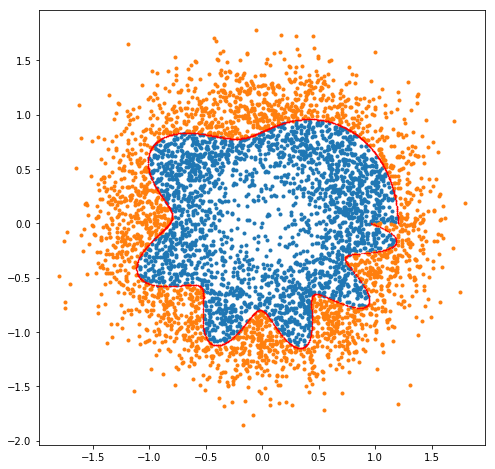

In [19]:
theta = np.random.rand(5000) * 2 * np.pi
r = np.random.normal(0, 0.3, 5000) + 1
x = np.cos(theta) * r
y = np.sin(theta) * r
z = (r > boundary(theta))

xy = np.array([(x[i], y[i]) for i in range(len(x))])

fig = plt.figure(figsize = (8, 8))
ax = plt.axes()
plot_data(ax, xy, z)
plot_boundary(ax)

## 2. 모델을 만들고, 학습합니다.

모델을 생성하기 위한 코드입니다. 여기서는 dense layer만 사용하는 단순한 모델을 사용합니다.

모델의 입력은 $(x, y)$, 출력은 $z$이므로 입력의 shape는 $(2,)$이고 출력단의 cell 개수는 1입니다.

In [5]:
def create_model(layers = [(4, 'tanh'), (8, 'tanh'), (2, 'tanh')], optimizer = 'rmsprop', loss = 'mse', verbose = 1):
    inp = Layers.Input(shape = (2,), name = 'input')
    l1 = inp
    for i, layer in enumerate(layers):
        l1 = Layers.Dense(layer[0], name = 'Dense{}'.format(i + 1))(l1)
        l1 = Layers.Activation(layer[1], name = 'Act{}'.format(i + 1))(l1)
    out = Layers.Dense(1, name = 'output')(l1)
    m = keras.Model(inp, out)
    if verbose == 1:
        m.summary()
    m.compile(optimizer = optimizer, loss = loss)
    
    return m

가장 간단한 모델을 50개의 데이터로 학습합니다. 결과는... 처참합니다.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 2)                 0         
_________________________________________________________________
Dense1 (Dense)               (None, 4)                 12        
_________________________________________________________________
Act1 (Activation)            (None, 4)                 0         
_________________________________________________________________
Dense2 (Dense)               (None, 8)                 40        
_________________________________________________________________
Act2 (Activation)            (None, 8)                 0         
_________________________________________________________________
Dense3 (Dense)               (None, 2)                 18        
_________________________________________________________________
Act3 (Activation)            (None, 2)                 0         
__________

50/50 [==============================] - 0s 133us/step - loss: 0.2296
Epoch 84/100
50/50 [==============================] - 0s 180us/step - loss: 0.2293
Epoch 85/100
50/50 [==============================] - 0s 140us/step - loss: 0.2282
Epoch 86/100
50/50 [==============================] - 0s 140us/step - loss: 0.2285
Epoch 87/100
50/50 [==============================] - 0s 140us/step - loss: 0.2287
Epoch 88/100
50/50 [==============================] - 0s 180us/step - loss: 0.2273
Epoch 89/100
50/50 [==============================] - 0s 140us/step - loss: 0.2270
Epoch 90/100
50/50 [==============================] - 0s 180us/step - loss: 0.2285
Epoch 91/100
50/50 [==============================] - 0s 140us/step - loss: 0.2261
Epoch 92/100
50/50 [==============================] - 0s 120us/step - loss: 0.2264
Epoch 93/100
50/50 [==============================] - 0s 140us/step - loss: 0.2259
Epoch 94/100
50/50 [==============================] - 0s 130us/step - loss: 0.2255
Epoch 95/100
50/5

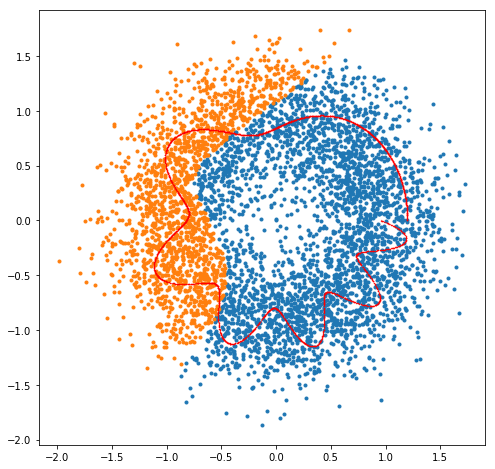

In [6]:
m = create_model(layers = [(4, 'tanh'), (8, 'tanh'), (2, 'tanh')], optimizer = 'rmsprop', loss = 'mse')
m.fit(xy[:50], z[:50], epochs=100, shuffle = True, verbose = 1)
z2 = m.predict(xy)[:, 0] > 0.5

fig = plt.figure(figsize = (8, 8))
ax = plt.axes()
plot_data(ax, xy, z2)
plot_boundary(ax)

## 3. 다양한 경우를 테스트합시다.

그럼 마찬가지로 더 복잡한 모델과, 더 많은 자료로 학습해 봅니다.

['tiny', (4, 'tanh')] 500
['tiny', (4, 'tanh')] 1000
['tiny', (4, 'tanh')] 5000
['small', (4, 'tanh'), (8, 'tanh')] 500
['small', (4, 'tanh'), (8, 'tanh')] 1000
['small', (4, 'tanh'), (8, 'tanh')] 5000
['medium', (4, 'tanh'), (8, 'tanh'), (8, 'tanh')] 500
['medium', (4, 'tanh'), (8, 'tanh'), (8, 'tanh')] 1000
['medium', (4, 'tanh'), (8, 'tanh'), (8, 'tanh')] 5000
['large', (4, 'tanh'), (8, 'tanh'), (8, 'tanh'), (8, 'tanh')] 500
['large', (4, 'tanh'), (8, 'tanh'), (8, 'tanh'), (8, 'tanh')] 1000
['large', (4, 'tanh'), (8, 'tanh'), (8, 'tanh'), (8, 'tanh')] 5000
['huge', (8, 'tanh'), (20, 'tanh'), (40, 'tanh'), (20, 'tanh'), (8, 'tanh')] 500
['huge', (8, 'tanh'), (20, 'tanh'), (40, 'tanh'), (20, 'tanh'), (8, 'tanh')] 1000
['huge', (8, 'tanh'), (20, 'tanh'), (40, 'tanh'), (20, 'tanh'), (8, 'tanh')] 5000


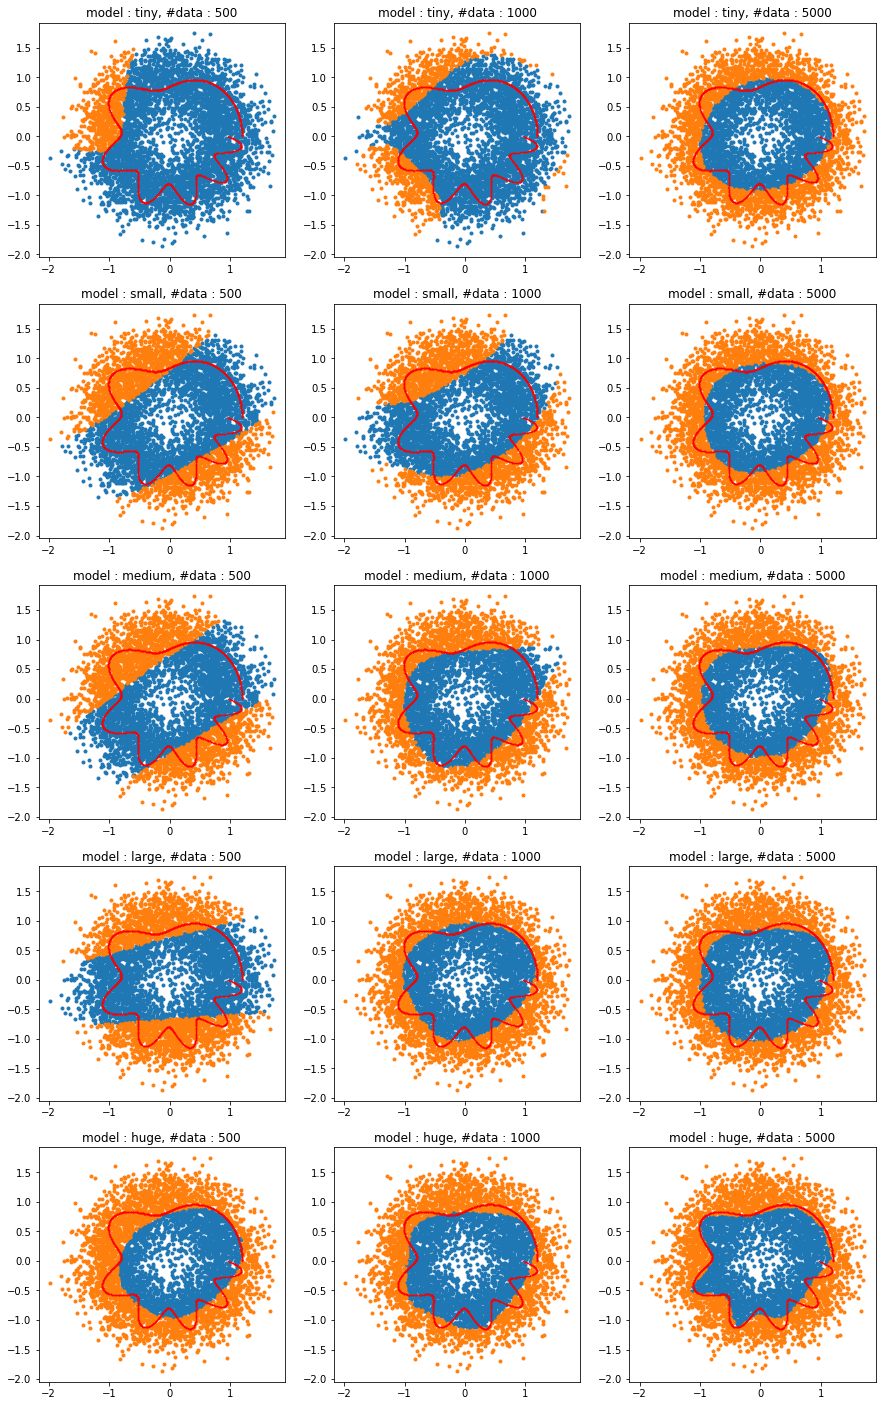

In [7]:
set_layers = [
    ['tiny', (4, 'tanh')],
    ['small', (4, 'tanh'), (8, 'tanh')],
    ['medium', (4, 'tanh'), (8, 'tanh'), (8, 'tanh')],
    ['large', (4, 'tanh'), (8, 'tanh'), (8, 'tanh'), (8, 'tanh')],
    ['huge', (8, 'tanh'), (20, 'tanh'), (40, 'tanh'), (20, 'tanh'), (8, 'tanh')]    
]
set_numdata = [500, 1000, 5000]
epochs = 100
batch_size = 100

fig = plt.subplots(len(set_layers), len(set_numdata), figsize = (5 * len(set_numdata), 5 * len(set_layers)))

for i, layers in enumerate(set_layers):
    m = create_model(layers = layers[1:], optimizer = 'rmsprop', loss = 'mse', verbose = 0)    
    for j, numdata in enumerate(set_numdata):
        print(layers, numdata)
        subfig = fig[1][i][j]
        m.compile(optimizer = 'rmsprop', loss = 'mse')
        m.fit(xy[:numdata], z[:numdata], batch_size = batch_size, epochs=epochs, shuffle = True, verbose = 0)
        z2 = np.reshape(m.predict(xy, batch_size = batch_size), (-1,)) > 0.5

        plot_data(subfig, xy, z2)
        plot_boundary(subfig)
        subfig.set_title('model : {}, #data : {}'.format(layers[0], numdata))

tanh를 relu로 바꾸는 게 좋을까요?

['tiny_r', (4, 'relu')] 500
['tiny_r', (4, 'relu')] 1000
['tiny_r', (4, 'relu')] 5000
['small_r', (4, 'relu'), (8, 'relu')] 500
['small_r', (4, 'relu'), (8, 'relu')] 1000
['small_r', (4, 'relu'), (8, 'relu')] 5000
['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')] 500
['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')] 1000
['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')] 5000
['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')] 500
['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')] 1000
['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')] 5000
['huge_r', (8, 'relu'), (20, 'relu'), (40, 'relu'), (20, 'relu'), (8, 'relu')] 500
['huge_r', (8, 'relu'), (20, 'relu'), (40, 'relu'), (20, 'relu'), (8, 'relu')] 1000
['huge_r', (8, 'relu'), (20, 'relu'), (40, 'relu'), (20, 'relu'), (8, 'relu')] 5000


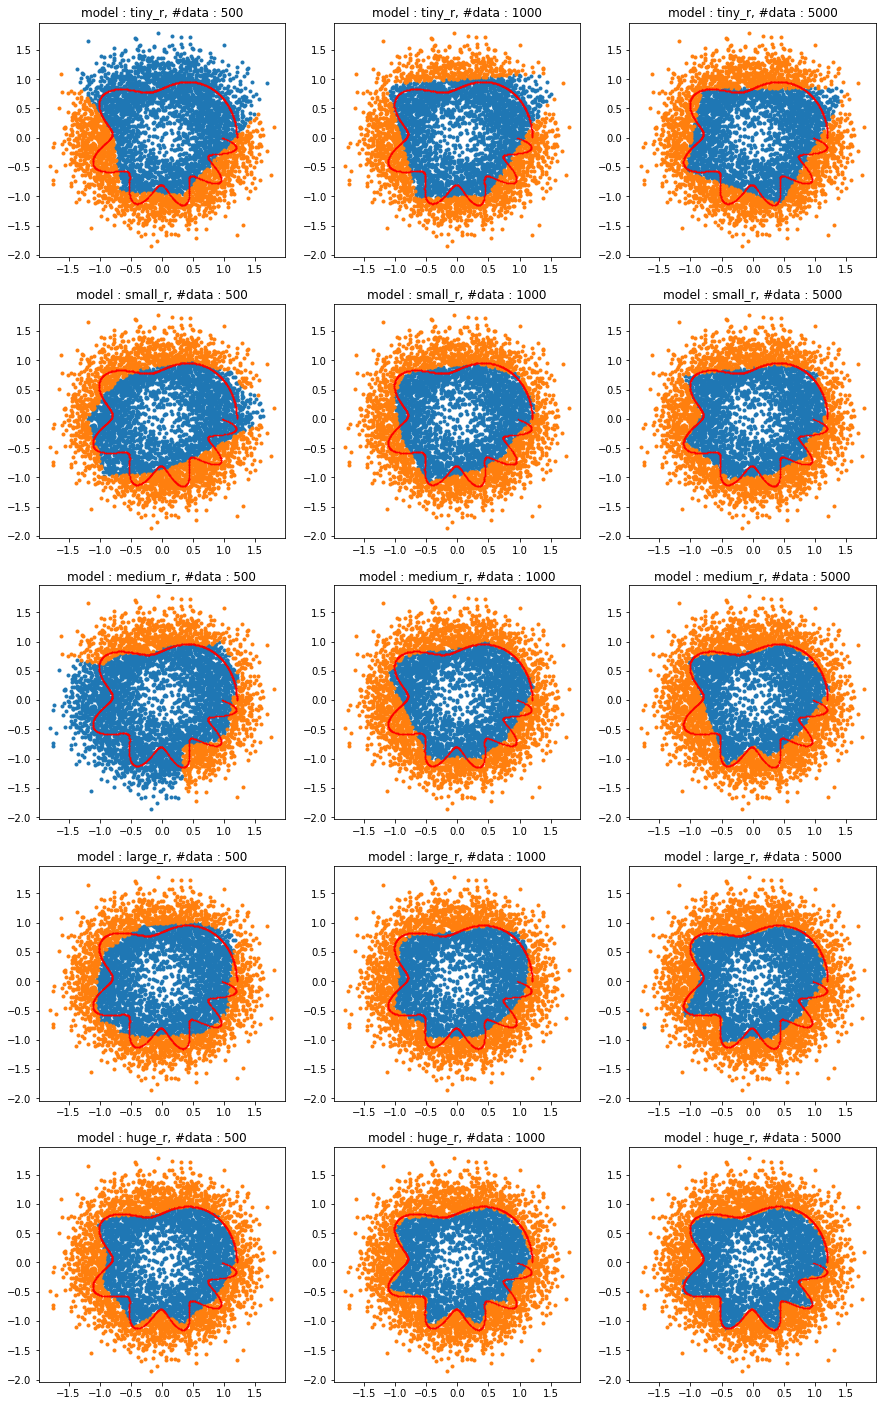

In [21]:
set_layers = [
    ['tiny_r', (4, 'relu')],
    ['small_r', (4, 'relu'), (8, 'relu')],
    ['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')],
    ['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')],
    ['huge_r', (8, 'relu'), (20, 'relu'), (40, 'relu'), (20, 'relu'), (8, 'relu')]
]
set_numdata = [500, 1000, 5000]
epochs = 100
batch_size = 100

fig = plt.subplots(len(set_layers), len(set_numdata), figsize = (5 * len(set_numdata), 5 * len(set_layers)))

for i, layers in enumerate(set_layers):
    m = create_model(layers = layers[1:], optimizer = 'rmsprop', loss = 'mse', verbose = 0)    
    for j, numdata in enumerate(set_numdata):
        print(layers, numdata)
        subfig = fig[1][i][j]
        m.compile(optimizer = 'rmsprop', loss = 'mse')
        m.fit(xy[:numdata], z[:numdata], batch_size = batch_size, epochs=epochs, shuffle = True, verbose = 0)
        z2 = np.reshape(m.predict(xy, batch_size = batch_size), (-1,)) > 0.5

        plot_data(subfig, xy, z2)
        plot_boundary(subfig)
        subfig.set_title('model : {}, #data : {}'.format(layers[0], numdata))

네, 좋습니다. :-)

### 자료의 특징을 알면 좀 더 잘 학습할 수 있을까?

우리는 $(x, y) = \left(R \cdot cos(\theta), R \cdot sin (\theta)\right)$ 라는 사실을 알고 있습니다. 따라서 $R$과 $\theta$에 대해 학습할 수도 있습니다.

해 봅시다.

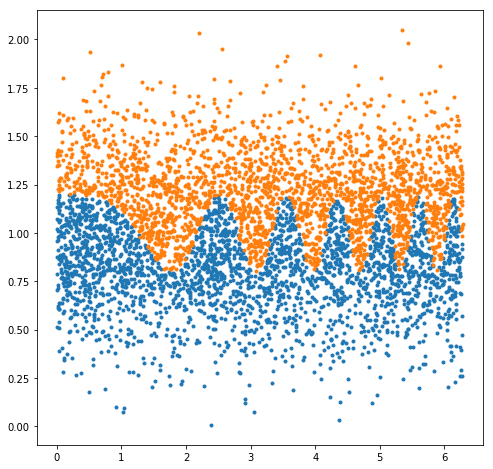

In [27]:
TR = np.array([(theta[i], r[i]) for i in range(len(theta))])

TR0 = np.array([TR[i] for i in range(len(theta)) if z[i] == 0])
TR1 = np.array([TR[i] for i in range(len(theta)) if z[i] == 1])

fig = plt.figure(figsize = (8, 8))
plt.plot(TR0[:, 0], TR0[:, 1], linestyle='', marker='.')
plt.plot(TR1[:, 0], TR1[:, 1], linestyle='', marker='.')

['tiny_r', (4, 'relu')] 500
['tiny_r', (4, 'relu')] 1000
['tiny_r', (4, 'relu')] 5000
['small_r', (4, 'relu'), (8, 'relu')] 500
['small_r', (4, 'relu'), (8, 'relu')] 1000
['small_r', (4, 'relu'), (8, 'relu')] 5000
['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')] 500
['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')] 1000
['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')] 5000
['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')] 500
['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')] 1000
['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')] 5000
['huge_r', (8, 'relu'), (20, 'relu'), (40, 'relu'), (20, 'relu'), (8, 'relu')] 500
['huge_r', (8, 'relu'), (20, 'relu'), (40, 'relu'), (20, 'relu'), (8, 'relu')] 1000
['huge_r', (8, 'relu'), (20, 'relu'), (40, 'relu'), (20, 'relu'), (8, 'relu')] 5000


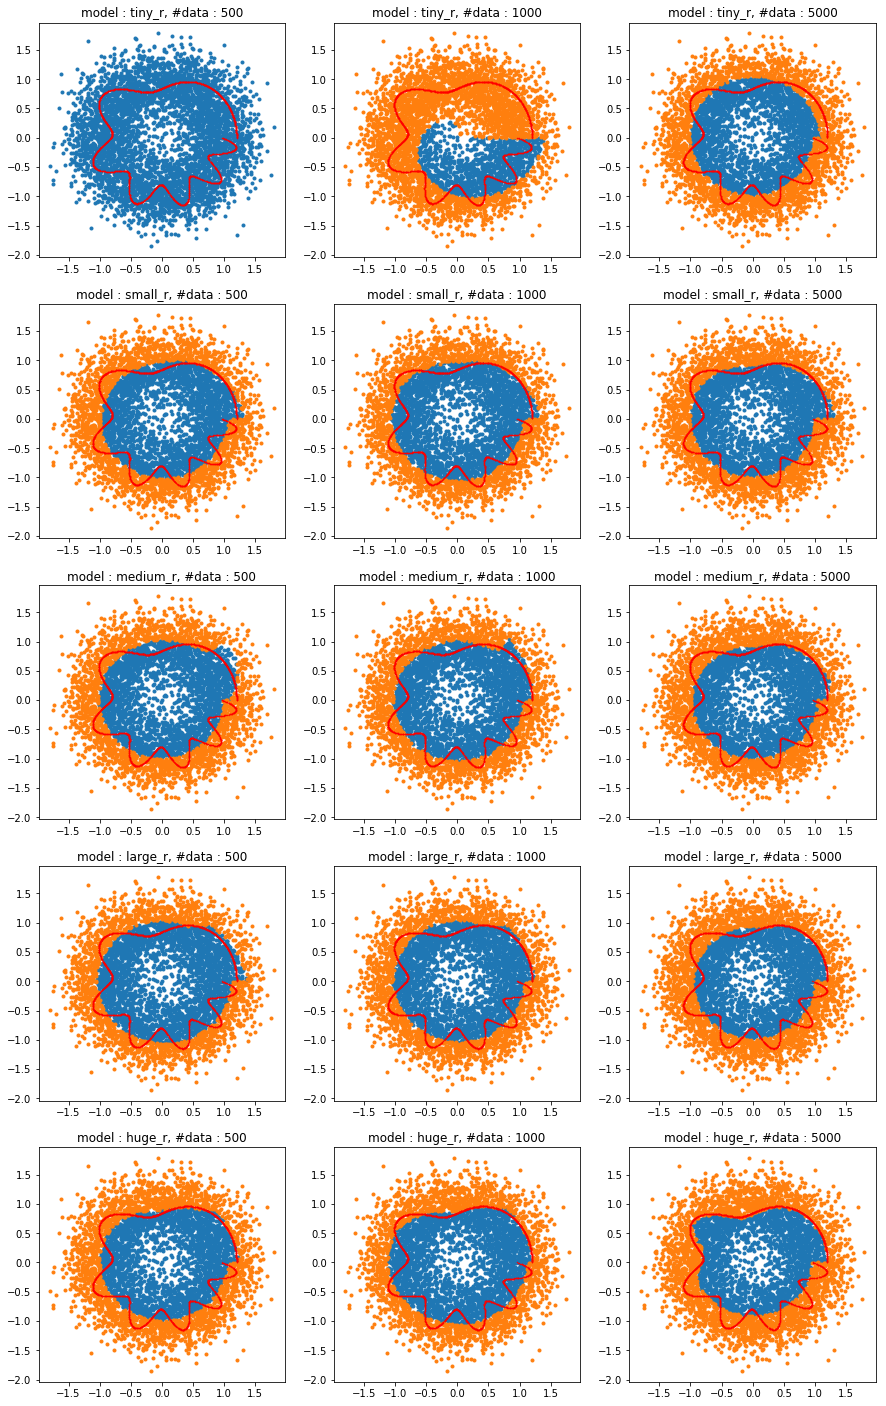

In [28]:
set_layers = [
    ['tiny_r', (4, 'relu')],
    ['small_r', (4, 'relu'), (8, 'relu')],
    ['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')],
    ['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')],
    ['huge_r', (8, 'relu'), (20, 'relu'), (40, 'relu'), (20, 'relu'), (8, 'relu')]
]
set_numdata = [500, 1000, 5000]
epochs = 100
batch_size = 100

fig = plt.subplots(len(set_layers), len(set_numdata), figsize = (5 * len(set_numdata), 5 * len(set_layers)))

for i, layers in enumerate(set_layers):
    m = create_model(layers = layers[1:], optimizer = 'rmsprop', loss = 'mse', verbose = 0)    
    for j, numdata in enumerate(set_numdata):
        print(layers, numdata)
        subfig = fig[1][i][j]
        m.compile(optimizer = 'rmsprop', loss = 'mse')
        m.fit(TR[:numdata], z[:numdata], batch_size = batch_size, epochs=epochs, shuffle = True, verbose = 0)
        z2 = np.reshape(m.predict(TR, batch_size = batch_size), (-1,)) > 0.5

        plot_data(subfig, xy, z2)
        plot_boundary(subfig)
        subfig.set_title('model : {}, #data : {}'.format(layers[0], numdata))

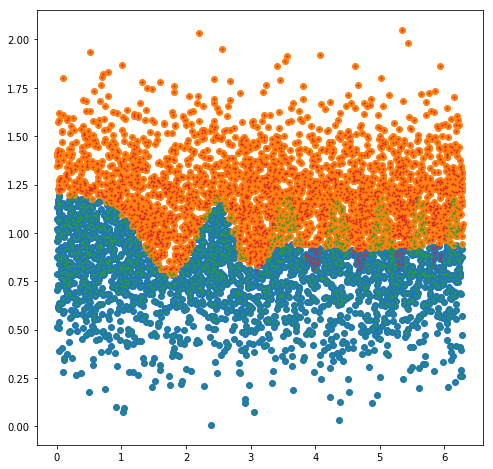

In [36]:
TR0_2 = np.array([TR[i] for i in range(len(theta)) if z2[i] == 0])
TR1_2 = np.array([TR[i] for i in range(len(theta)) if z2[i] == 1])

fig = plt.figure(figsize = (8, 8))
plt.plot(TR0_2[:, 0], TR0_2[:, 1], linestyle='', marker='o')
plt.plot(TR1_2[:, 0], TR1_2[:, 1], linestyle='', marker='o')
plt.plot(TR0[:, 0], TR0[:, 1], linestyle='', marker='.', markersize = 2)
plt.plot(TR1[:, 0], TR1[:, 1], linestyle='', marker='.', markersize = 2)

$cos$, $sin$ 함수를 덜어낸 만큼 더 잘 학습할 거라고 생각했는데 현실은...

## 4. boundary를 주면 얼마나 자세히 fitting할 수 있을까?

데이터를 바꿔서 이번엔 경계선을 학습자료로 줍니다.

전체 5000개의 데이터(점) 중에서 별 모양의 경계선 위에 3000개의 점이 있도록 만듭니다. 그림을 그리면 아래와 같습니다.

참고로 이 경우 경계선이 눈에 띄게 보이려면 데이터가 최소 1000개는 있어야 합니다.

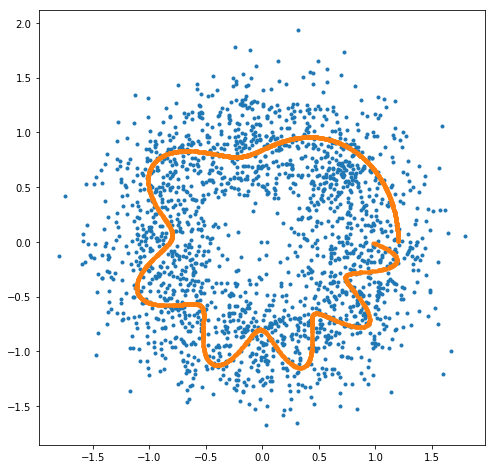

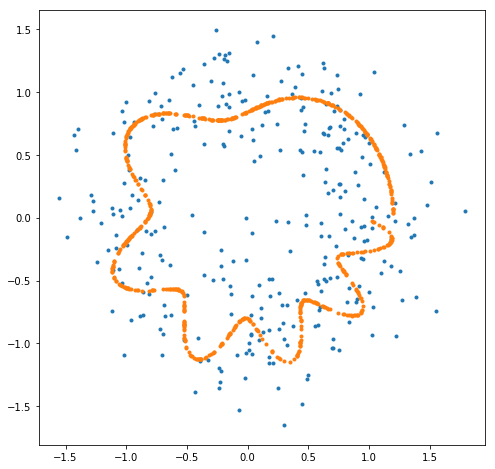

In [17]:
num_all_data = 5000
num_bdd_data = 3000

theta_bdd = np.random.rand(num_all_data) * 2 * np.pi
r_bdd = np.random.normal(0, 0.3, len(theta)) + 1
random_index = np.array(np.random.rand(num_bdd_data * 2) * num_all_data, dtype=int)
random_index = set(random_index)
random_index = np.array(list(random_index))[:num_bdd_data]
r_bdd[random_index] = boundary(theta_bdd[random_index])
x_bdd = np.cos(theta_bdd) * r_bdd
y_bdd = np.sin(theta_bdd) * r_bdd
z_bdd = np.zeros(len(theta_bdd))
z_bdd[random_index] = 1

xy_bdd = np.array([(x_bdd[i], y_bdd[i]) for i in range(len(x))])

fig = plt.figure(figsize = (8, 8))
ax = plt.axes()
plot_data(ax, xy_bdd, z_bdd)
plt.show()

fig = plt.figure(figsize = (8, 8))
ax = plt.axes()
plot_data(ax, xy_bdd[:1000], z_bdd[:1000])
plt.show()


relu를 쓰는 경우 학습이 잘 되나 보겠습니다. 꽤 재미있는 결과가 나올 것입니다.

['tiny_r', (4, 'relu')] 500
['tiny_r', (4, 'relu')] 1000
['tiny_r', (4, 'relu')] 5000
['small_r', (4, 'relu'), (8, 'relu')] 500
['small_r', (4, 'relu'), (8, 'relu')] 1000
['small_r', (4, 'relu'), (8, 'relu')] 5000
['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')] 500
['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')] 1000
['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')] 5000
['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')] 500
['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')] 1000
['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')] 5000
['huge_r', (8, 'relu'), (20, 'relu'), (40, 'relu'), (20, 'relu'), (8, 'relu')] 500
['huge_r', (8, 'relu'), (20, 'relu'), (40, 'relu'), (20, 'relu'), (8, 'relu')] 1000
['huge_r', (8, 'relu'), (20, 'relu'), (40, 'relu'), (20, 'relu'), (8, 'relu')] 5000


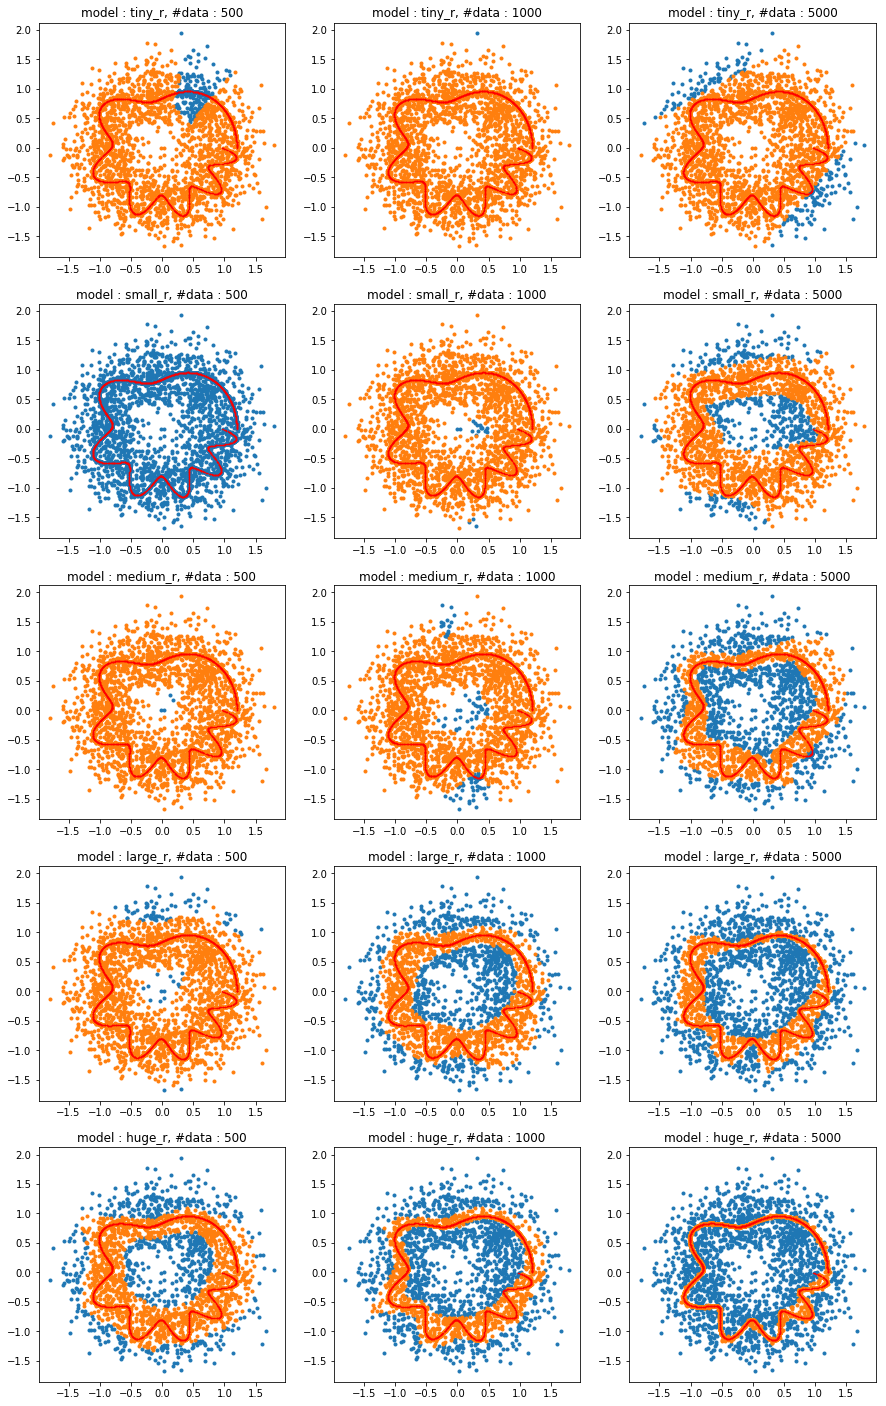

In [18]:
set_layers = [
    ['tiny_r', (4, 'relu')],
    ['small_r', (4, 'relu'), (8, 'relu')],
    ['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')],
    ['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')],
    ['huge_r', (8, 'relu'), (20, 'relu'), (40, 'relu'), (20, 'relu'), (8, 'relu')]
]
set_numdata = [500, 1000, 5000]
epochs = 100
batch_size = 100

fig = plt.subplots(len(set_layers), len(set_numdata), figsize = (5 * len(set_numdata), 5 * len(set_layers)))

for i, layers in enumerate(set_layers):
    m = create_model(layers = layers[1:], optimizer = 'rmsprop', loss = 'mse', verbose = 0)    
    for j, numdata in enumerate(set_numdata):
        print(layers, numdata)
        subfig = fig[1][i][j]
        m.compile(optimizer = 'rmsprop', loss = 'mse')
        m.fit(xy_bdd[:numdata], z_bdd[:numdata], batch_size = batch_size, epochs=epochs, shuffle = True, verbose = 0)
        z2_bdd = np.reshape(m.predict(xy_bdd, batch_size = batch_size), (-1,)) > 0.5

        plot_data(subfig, xy_bdd, z2_bdd)
        plot_boundary(subfig)
        subfig.set_title('model : {}, #data : {}'.format(layers[0], numdata))